In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
import matplotlib as mpl 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

Selecting previously unselected package fonts-nanum.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2.csv


In [ ]:
#결측치로 변경
df = pd.read_csv('vgames2.csv', na_values = 'Unknown')

In [ ]:
# 결측치 보면서 상관관계를 찾으려 했지만 .. year만 채워주기로 결정 ^^
df[df['Year'].isnull()|df['Genre'].isnull()|df['Publisher'].isnull()]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
30,31,Kids Learn Music A+ Edition,DS,2011.0,Misc,NaN,0.05,0,0,0
31,32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
50,51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,NaN,0,0,0.02,0
212,213,Wild West Shootout,Wii,2010.0,Shooter,NaN,0.01,0.01,0,0
...,...,...,...,...,...,...,...,...,...,...
16431,16432,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16432,16433,Bejeweled 3,X360,NaN,Puzzle,NaN,0.13,0,0,0.01
16500,16501,The Dark Hills of Cherai,PC,2009.0,Puzzle,NaN,0,0.01,0,0
16555,16556,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


In [ ]:
#결측치 과감히 삭제 !
df.dropna(subset =['Genre','Publisher','Year'], inplace=True)
df = df.reset_index(drop=True)

In [ ]:
#결측치 합계 0임을 확인
df.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
#M제거
df['NA_Sales'] = df['NA_Sales'].str.replace("M","")
df['EU_Sales'] = df['EU_Sales'].str.replace("M","")
df['JP_Sales'] = df['JP_Sales'].str.replace("M","")
df['Other_Sales'] = df['Other_Sales'].str.replace("M","")
#K인덱스 불러오기
na_index = df[df['NA_Sales'].str.contains('K')].index
eu_index = df[df['EU_Sales'].str.contains('K')].index
jp_index = df[df['JP_Sales'].str.contains('K')].index
other_index = df[df['Other_Sales'].str.contains('K')].index
#K제거
df['NA_Sales'] = df['NA_Sales'].str.replace("K","")
df['EU_Sales'] = df['EU_Sales'].str.replace("K","")
df['JP_Sales'] = df['JP_Sales'].str.replace("K","")
df['Other_Sales'] = df['Other_Sales'].str.replace("K","")
#object 형태에서 float형태로 변환
df['NA_Sales']=df['NA_Sales'].astype(float, errors='ignore')
df['EU_Sales']=df['EU_Sales'].astype(float, errors='ignore')
df['JP_Sales']=df['JP_Sales'].astype(float, errors='ignore')
df['Other_Sales']=df['Other_Sales'].astype(float, errors='ignore')
#단위환산
for i in na_index:
  df.loc[i, 'NA_Sales'] = df.loc[i, 'NA_Sales'] / 1000
for i in eu_index:
  df.loc[i, 'EU_Sales'] = df.loc[i, 'EU_Sales'] / 1000
for i in jp_index:
  df.loc[i, 'JP_Sales'] = df.loc[i, 'JP_Sales'] / 1000
for i in other_index:
  df.loc[i, 'Other_Sales'] = df.loc[i, 'Other_Sales'] / 1000

In [ ]:
# year 두자리 채워주기 
dffyear = df[df.Year < 100 ].Year
dffyear

71        9.0
78       97.0
208      11.0
297      15.0
752       3.0
         ... 
15549    94.0
15663     8.0
15706     8.0
15946     0.0
16029    98.0
Name: Year, Length: 100, dtype: float64

In [ ]:
#50이상은 1900년대로 바꿔주고 50이하는 2000년대로 바꿔줌
def x(dffyear):
     if (dffyear > 50) and (dffyear < 100):
        dffyear = dffyear+1900
     elif dffyear <50:
         dffyear = dffyear+2000
     return dffyear

df['Year'] = df['Year'].map(x)

In [ ]:
#year float 형태에서 int형태로 바꿔줌
df=df.astype({'Year':'int'},errors='ignore')

In [ ]:
#히트맵을 이용하여 장르와 지역별 판매량 확인하기 
sales_heat = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
map = sales_heat.groupby('Genre').sum() #sum을 해줘서 합쳤기 때문에 따로 공분을 진행하지 않았음
map

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,857.49,513.04,155.62,183.92
Adventure,101.44,63.58,51.48,16.68
Fighting,220.35,99.90,87.10,36.15
Misc,393.64,207.43,104.09,72.47
Platform,445.28,200.45,130.53,51.43
Puzzle,121.32,50.23,56.18,12.42
Racing,354.62,233.90,55.90,76.17
Role-Playing,317.46,182.63,341.59,56.54
Shooter,574.27,310.20,38.18,101.85


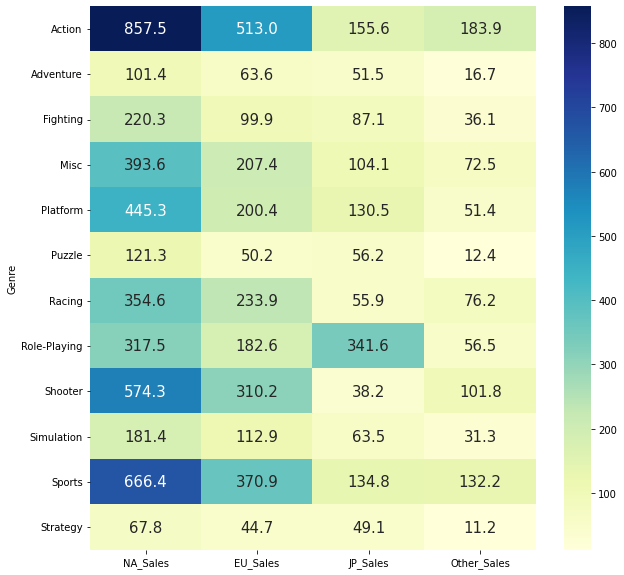

In [ ]:
#annot = 수치표현
plt.figure(figsize=(10,10))
sns.heatmap(map, annot=True, fmt ='.1f', annot_kws ={'size':15}, cmap = "YlGnBu")
plt.show()
#NA_Sales : 1)Action,2)Sports,3)Shooter #EU_Sales : 1)Action,2)Sports,3)Shooter #JP_Sales : 1)Role-Playing,2)Action,3)Sports #Other_Sales :1)Action,2)Sports,3)Shooter 을 알 수 있음

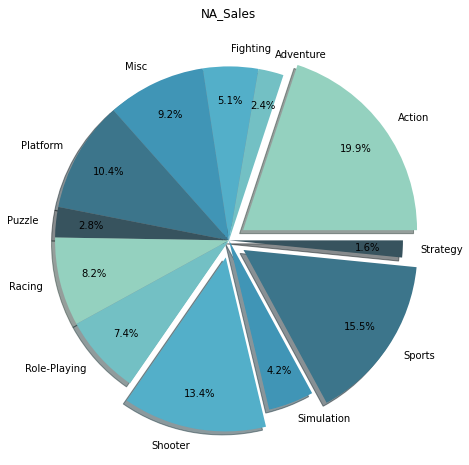

In [ ]:
#히트맵으로 지역별 선호장르 파악하기 #NA
NA_labels = ['Action', 'Adventure','Fighting',  'Misc',  'Platform','Puzzle', 'Racing','Role-Playing','Shooter', 'Simulation','Sports', 'Strategy' ] 
explode = (0.1, 0, 0, 0, 0,0,0,0,0.1,0,0.1,0)
NA = df.groupby(['Genre'])['NA_Sales'].sum()
colors= sns.color_palette("GnBu_d")
plt.figure(figsize=(8, 8))
plt.pie(NA, autopct='%0.1f%%', labels=NA_labels, explode=explode, pctdistance=0.8,shadow=True, colors=colors)
plt.title('NA_Sales')
plt.show()

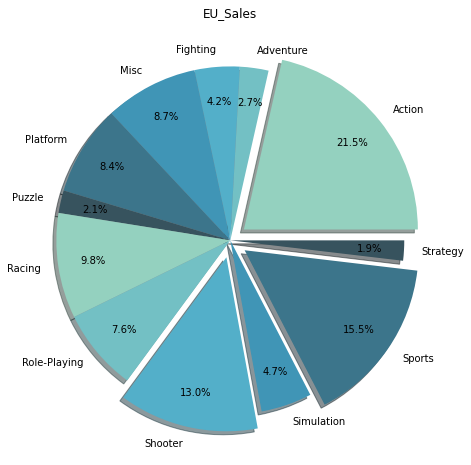

In [ ]:
#히트맵으로 지역별 선호장르 파악하기 #EU
EU_labels= ['Action', 'Adventure','Fighting',  'Misc',  'Platform','Puzzle', 'Racing','Role-Playing','Shooter', 'Simulation','Sports', 'Strategy' ] 
explode = (0.1, 0, 0, 0, 0,0,0,0,0.1,0,0.1,0)
EU = df.groupby(['Genre'])['EU_Sales'].sum()
colors= sns.color_palette("GnBu_d")
plt.figure(figsize=(8, 8))
plt.pie(EU, autopct='%0.1f%%', labels=NA_labels, explode=explode, pctdistance=0.8,shadow=True, colors=colors)
plt.title('EU_Sales')
plt.show()

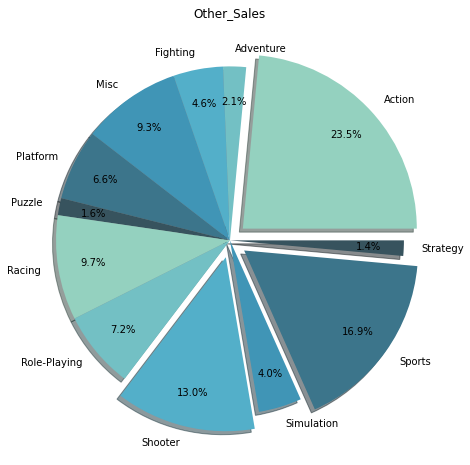

In [ ]:
#히트맵으로 지역별 선호장르 파악하기 #OTHER
Other_labels= ['Action', 'Adventure','Fighting',  'Misc',  'Platform','Puzzle', 'Racing','Role-Playing','Shooter', 'Simulation','Sports', 'Strategy' ] 
explode = (0.1, 0, 0, 0, 0,0,0,0,0.1,0,0.1,0)
Other = df.groupby(['Genre'])['Other_Sales'].sum()
colors= sns.color_palette("GnBu_d")
plt.figure(figsize=(8, 8))
plt.pie(Other, autopct='%0.1f%%', labels=NA_labels, explode=explode, pctdistance=0.8,shadow=True, colors=colors)
plt.title('Other_Sales')
plt.show()

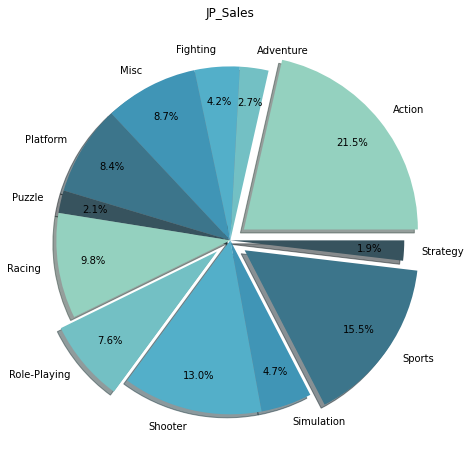

In [ ]:

JP_labels= ['Action', 'Adventure','Fighting',  'Misc',  'Platform','Puzzle', 'Racing','Role-Playing','Shooter', 'Simulation','Sports', 'Strategy' ] 
explode = (0.1, 0, 0, 0, 0,0,0,0.1,0,0,0.1,0)
JP = df.groupby(['Genre'])['JP_Sales'].sum()
colors= sns.color_palette("GnBu_d")
plt.figure(figsize=(8, 8))
plt.pie(EU, autopct='%0.1f%%', labels=JP_labels, explode=explode, pctdistance=0.8,shadow=True, colors=colors)
plt.title('JP_Sales')
plt.show()

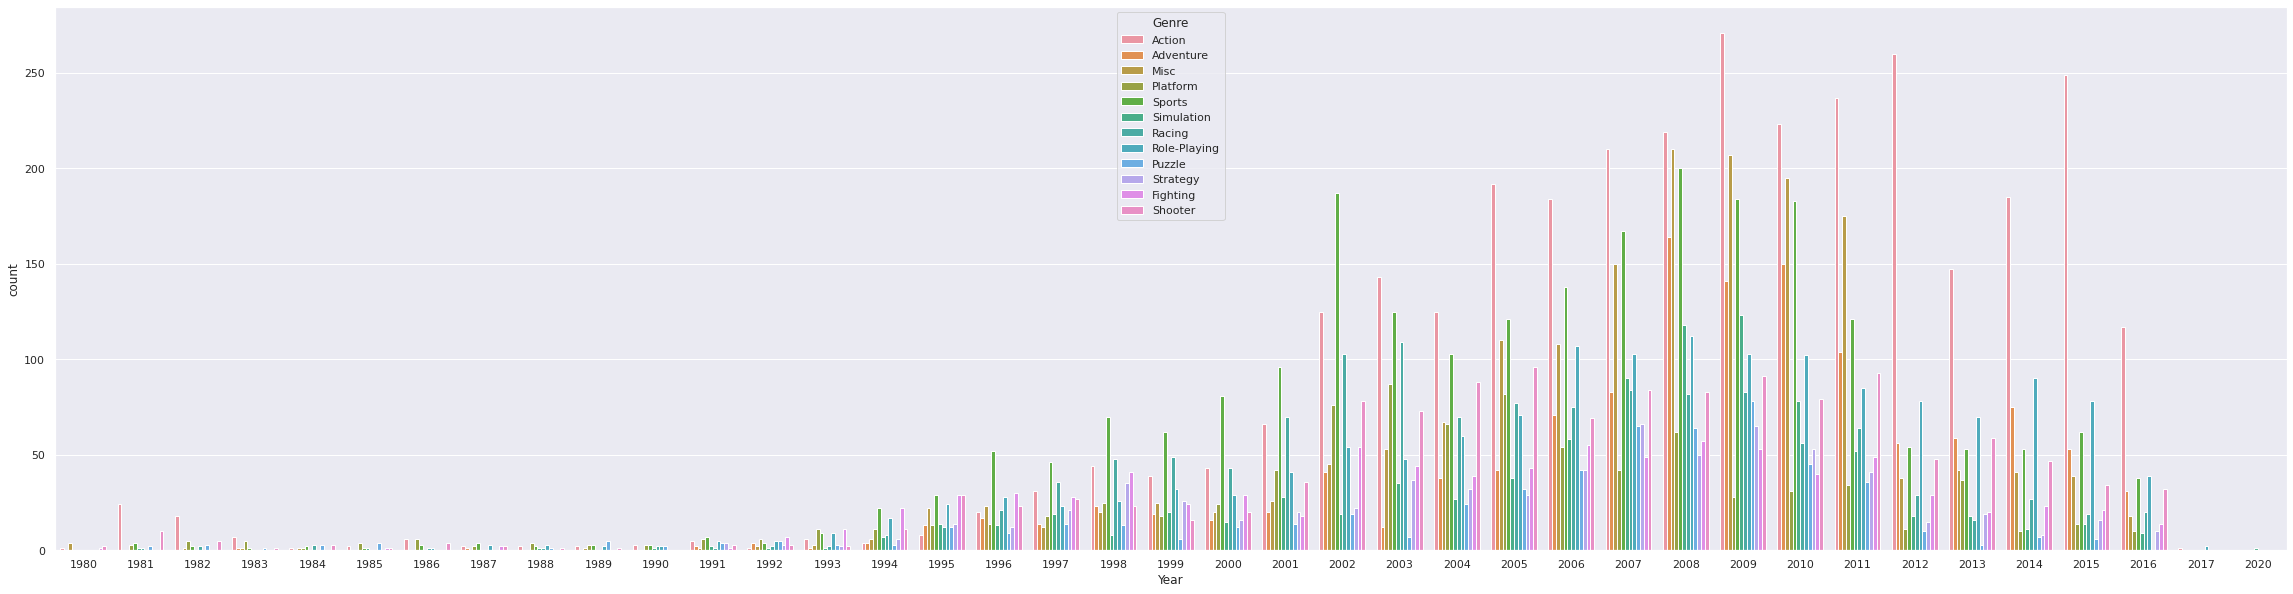

In [ ]:
# 연도별 장르에 변화에 대해서 알아낸 정보는 최근 10년동안에서는  ACtion이 유망한 장르이다. 
sns.set(style='darkgrid')
plt.figure(figsize=(40,10))
sns.countplot(x='Year', data=df,hue = 'Genre')
plt.show()

In [ ]:
#Total_Sales 만들어주기 
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df['Total_Sales']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16142 entries, 0 to 16141
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16142 non-null  int64  
 1   Name         16142 non-null  object 
 2   Platform     16142 non-null  object 
 3   Year         16142 non-null  int64  
 4   Genre        16142 non-null  object 
 5   Publisher    16142 non-null  object 
 6   NA_Sales     16142 non-null  float64
 7   EU_Sales     16142 non-null  float64
 8   JP_Sales     16142 non-null  float64
 9   Other_Sales  16142 non-null  float64
 10  Total_Sales  16142 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [ ]:
#연도별로 장르선호도가 가장 높은 값 조사
year_genre = pd.DataFrame(df.groupby(['Year','Genre'])['Total_Sales'].count()).reset_index()
year_genre.columns = ['Year','Genre','Total_Sales']
year_genre =year_genre.sort_values(by=['Year','Total_Sales'], ascending=True)
year_genre.drop_duplicates(subset='Year', keep='last', inplace=True)
year_genre = year_genre.reset_index(drop=True)
year_genre

,Year,Genre,Total_Sales
0,1980,Misc,4
1,1981,Action,24
2,1982,Action,18
3,1983,Action,7
4,1984,Shooter,3
5,1985,Puzzle,4
6,1986,Platform,6
7,1987,Sports,4
8,1988,Platform,4
9,1989,Puzzle,5


In [ ]:
# 시리즈 형태로 만들기 
label = year_genre['Genre'].values
label

array(['Misc', 'Action', 'Action', 'Action', 'Shooter', 'Puzzle',
       'Platform', 'Sports', 'Platform', 'Puzzle', 'Sports', 'Sports',
       'Fighting', 'Platform', 'Sports', 'Sports', 'Sports', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Role-Playing', 'Simulation'], dtype=object)

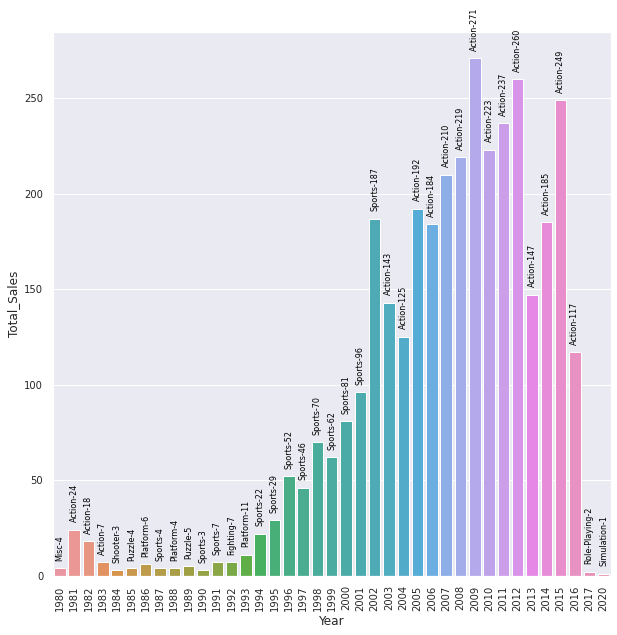

In [ ]:
# 연도별 가장 유명했던 장르 파악하기 #bar위에 장르이름 넣기 
plt.figure(figsize=(10,10))
bar = sns.barplot(x='Year', y='Total_Sales',data=year_genre)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
cnt = 0
for value in year_genre['Total_Sales']:
    bar.text(x=cnt, y=value + 5, s=str(label[cnt] + '-' + str(value)),
            color='black', size=8, rotation=90, ha='center')
    cnt+=1
plt.show()
# label = year_genre['Genre']
# def add_value_label(x_list,y_list):
#     for i in range(1, len(x_list)+1):
#         plt.annotate(y_list[i-1],(i,y_list[i-1]),ha="center")
#enumerate()

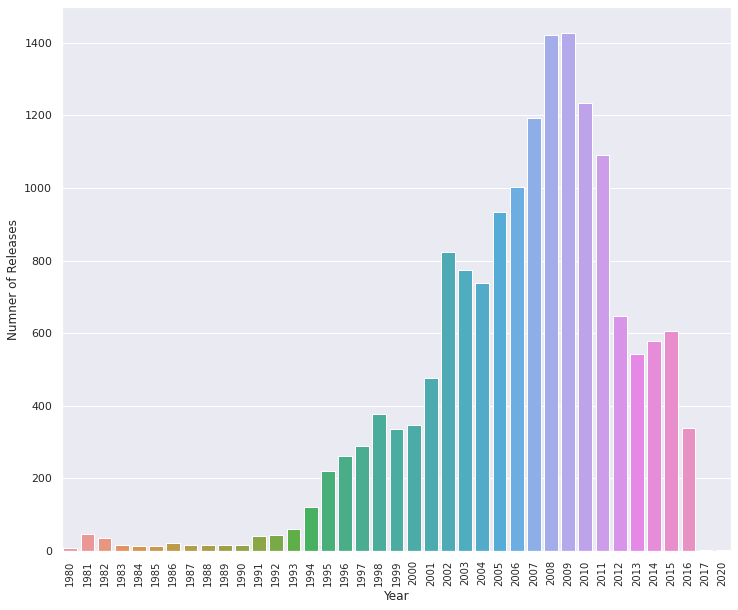

In [ ]:
#Game Release Per Year 연도별 발매량 파악하기 
x = df.groupby(['Year']).count()
x = x['Total_Sales']
y= x.index.astype(int)

plt.figure(figsize=(12,10))
ax = sns.barplot(x=y, y=x)
ax.set_ylabel(ylabel='Numner of Releases')
plt.xticks(rotation=90, fontsize=10)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

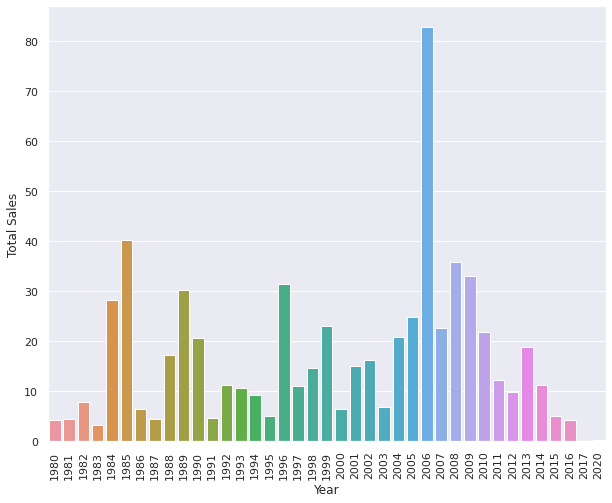

In [ ]:
#가장 게임 수입이 가장 높았던 연도 
table = df.pivot_table('Total_Sales', index='Name', columns='Year')
game = table.idxmax()
sales = table.max()
years = table.columns
data = pd.concat([game, sales],axis=1)
data.columns = ['Game', 'Total Sales']
plt.figure(figsize=(10,8))
sns.barplot(x=years, y='Total Sales',data =  data)
plt.xticks(rotation = 90)

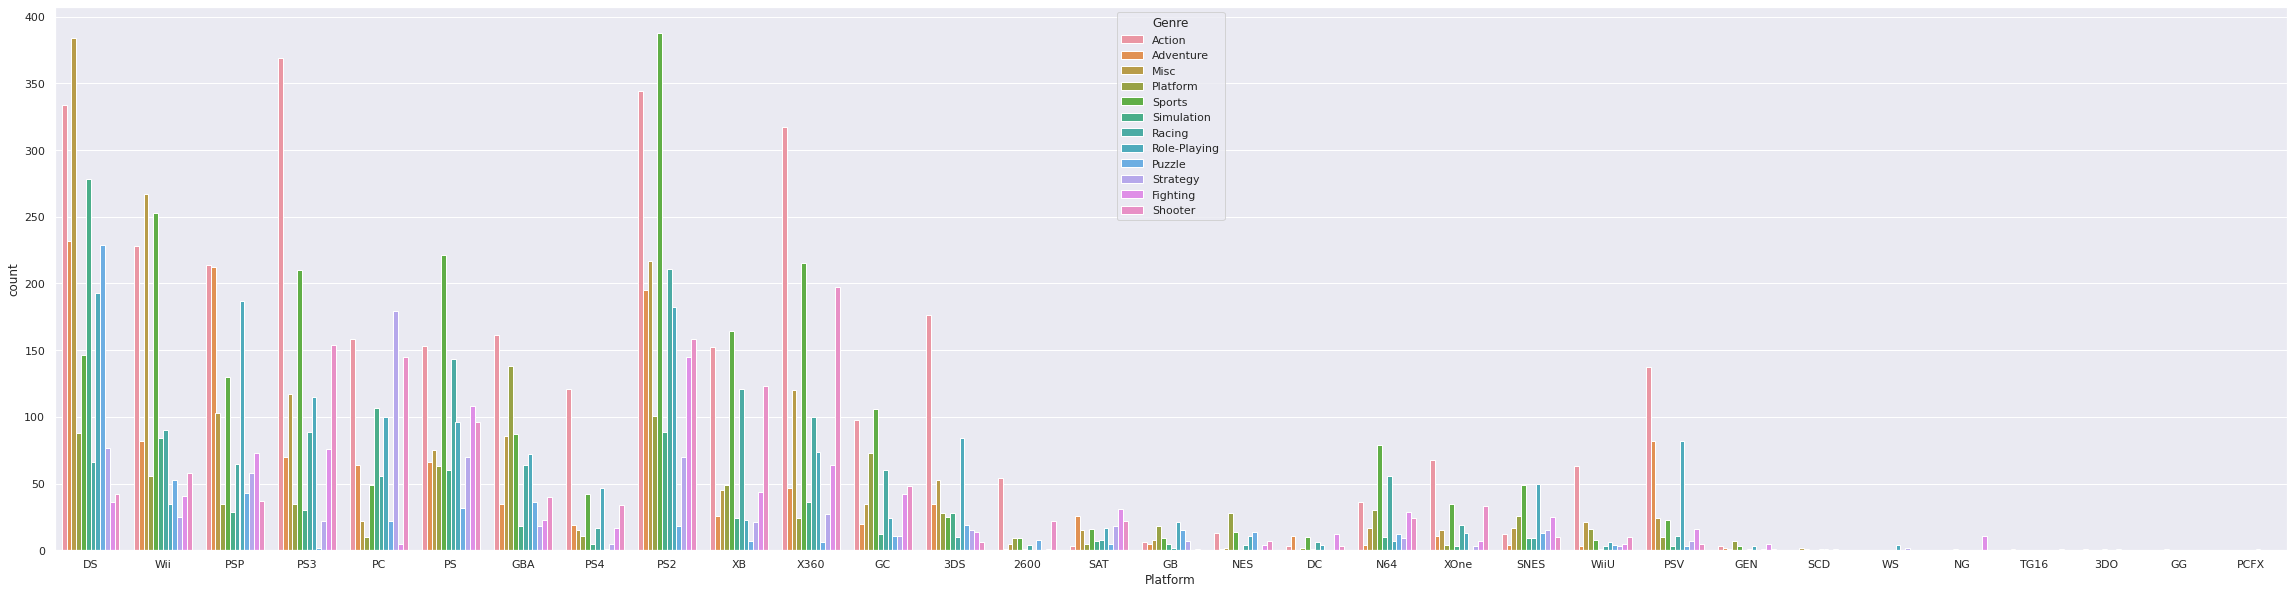

In [ ]:
# platform별 장르에 관해서 
sns.set(style='darkgrid')
plt.figure(figsize=(40,10))
sns.countplot(x='Platform', hue = 'Genre', data=df)
plt.show()

In [ ]:
#가장 인기있는 platform 파악하기 
best_platform = pd.DataFrame(df.Platform.value_counts().sort_values())
best_platform
#df.Platform.value_counts().sort_values()

,Platform
PCFX,1
GG,1
TG16,2
3DO,3
WS,6
SCD,6
NG,12
GEN,27
DC,52
GB,97


<Figure size 1080x720 with 0 Axes>

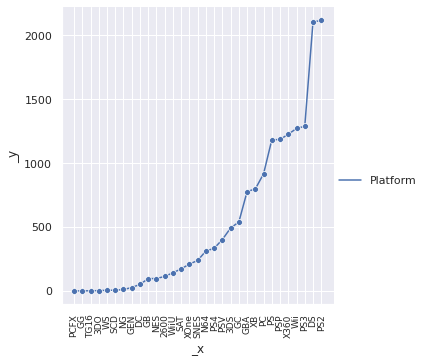

In [ ]:
#제일 선호도 높은 플랫폼 파악하기
#sns.set(style='darkgrid')
#축 이름 변경하기
#top plarforms 파악하기 
plt.figure(figsize=(15,10))
sns.relplot(data=best_platform, kind='line',marker='o',color='red')
plt.xticks(rotation=90, fontsize =9)
plt.show()
 #labels={'_x':'Platform',''_y:'Counts'}

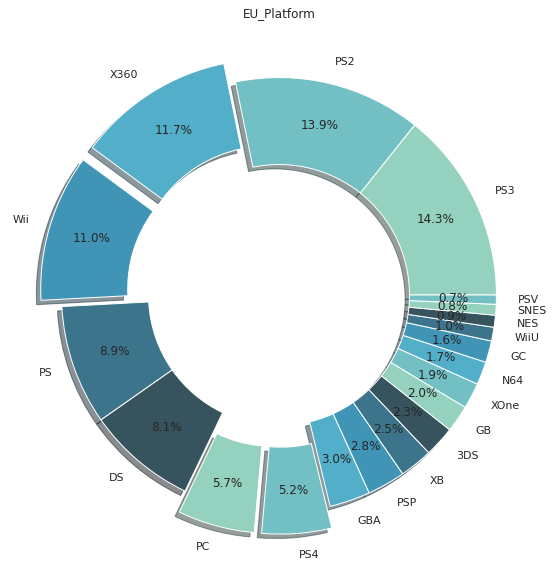

In [ ]:
#가장 유명한 플랫폼 선정하기 #EU
platform = df[['Platform','EU_Sales']]
platform['Total_sales']=platform.groupby('Platform')['EU_Sales'].transform('sum')
platform.drop('EU_Sales', axis=1, inplace=True)
platform = platform.drop_duplicates()
platform = platform.sort_values('Total_sales', ascending=False)
platform = platform.head(20)
wed={'width':0.4}
colors= sns.color_palette("GnBu_d")
plt.figure(figsize=(10,10))
explode = (0,0,0.1,0.1,0,0,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0)
#plt.pie(game['Total_Sales'], labels=game['Name'], autopct='%0.1f%%',shadow=True, colors=colors, explode=explode,pctdistance=0.8)
plt.pie(platform['Total_sales'], labels=platform['Platform'],
        colors=colors,explode=explode,
         autopct='%.1f%%',shadow=True, pctdistance=0.8,wedgeprops=wed)
plt.title('EU_Platform')

plt.show()

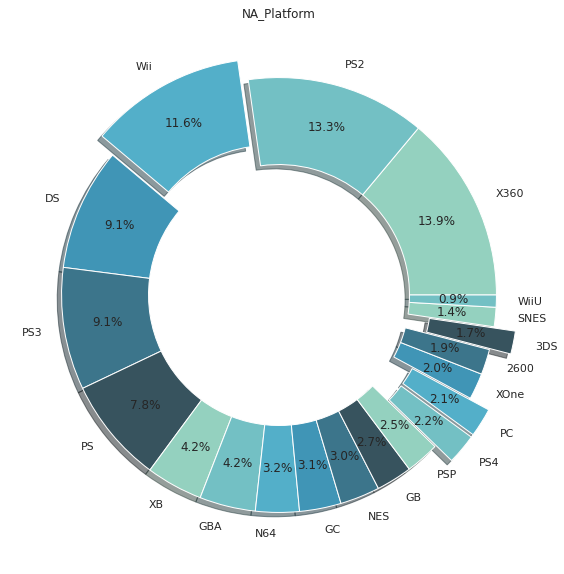

In [ ]:
#가장 유명한 플랫폼 선정하기 #NA
platform = df[['Platform','NA_Sales']]
platform['Total_sales']=platform.groupby('Platform')['NA_Sales'].transform('sum')
platform.drop('NA_Sales', axis=1, inplace=True)
platform = platform.drop_duplicates()
platform = platform.sort_values('Total_sales', ascending=False)
platform = platform.head(20)
explode = (0,0,0.1,0,0,0,0,0,0,0,0,0,0,0.1,0.1,0,0,0.1,0,0)
wed={'width':0.4}
colors= sns.color_palette("GnBu_d")
plt.figure(figsize=(10,10))
#plt.pie(game['Total_Sales'], labels=game['Name'], autopct='%0.1f%%',shadow=True, colors=colors, explode=explode,pctdistance=0.8)
plt.pie(platform['Total_sales'], labels=platform['Platform'],
        colors=colors,explode=explode,
         autopct='%.1f%%',shadow=True, pctdistance=0.8,wedgeprops=wed)
plt.title('NA_Platform')

plt.show()

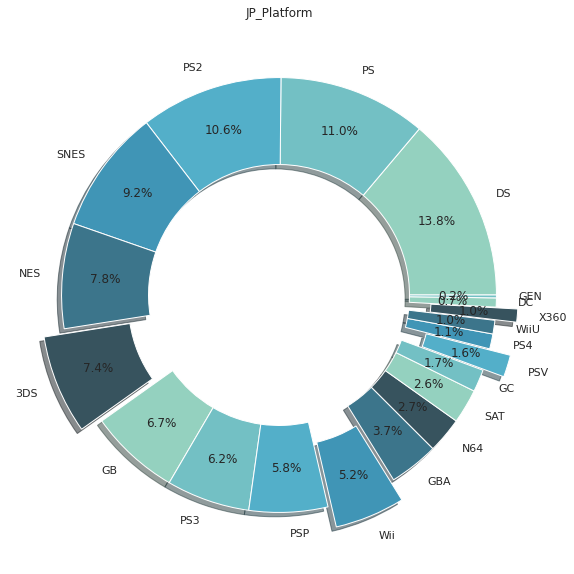

In [ ]:
#가장 유명한 플랫폼 선정하기 #JP
platform = df[['Platform','JP_Sales']]
platform['Total_sales']=platform.groupby('Platform')['JP_Sales'].transform('sum')
platform.drop('JP_Sales', axis=1, inplace=True)
platform = platform.drop_duplicates()
platform = platform.sort_values('Total_sales', ascending=False)
platform = platform.head(20)
wed={'width':0.4}
explode = (0,0,0,0,0,0.1,0,0,0,0.1,0,0,0,0,0.1,0,0,0.1,0,0)
colors= sns.color_palette("GnBu_d")
plt.figure(figsize=(10,10))
#plt.pie(game['Total_Sales'], labels=game['Name'], autopct='%0.1f%%',shadow=True, colors=colors, explode=explode,pctdistance=0.8)
plt.pie(platform['Total_sales'], labels=platform['Platform'],
        colors=colors,explode=explode,
         autopct='%.1f%%',shadow=True, pctdistance=0.8,wedgeprops=wed)
plt.title('JP_Platform')

plt.show()

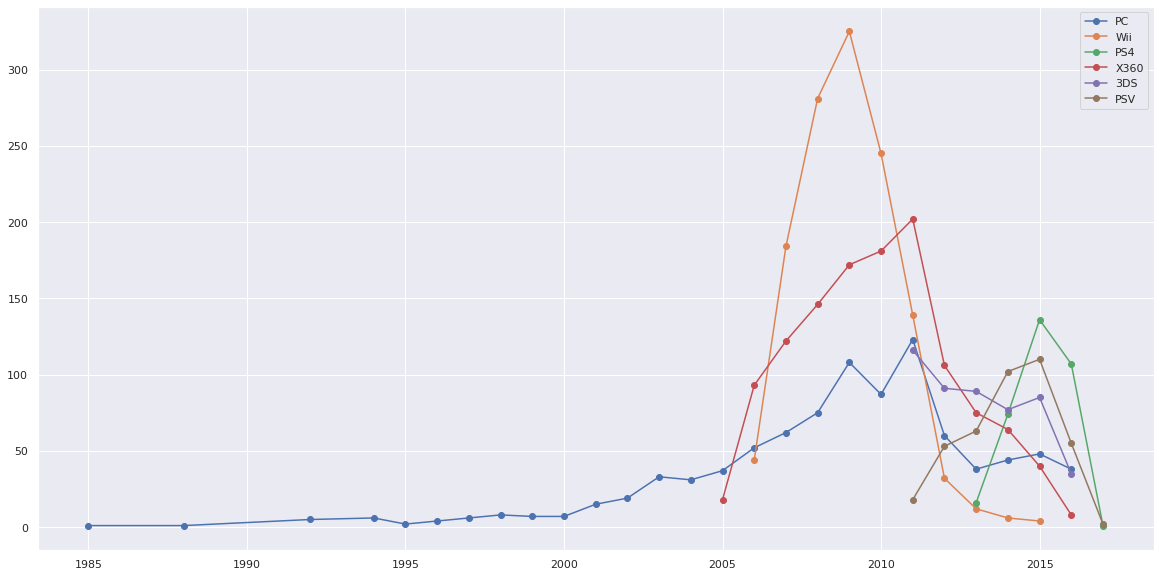

In [ ]:
#연도별 플랫폼판매량 비율파악 
plt.figure(figsize=(20,10))
#PC필요
pc= df.Platform == 'PC'
dfpc = df.loc[pc]
dfpc = dfpc.groupby(['Year','Platform']).size().reset_index(name='Count')
plt.plot(dfpc['Year'],dfpc['Count'],marker='o',label='PC')
#Will
will= df.Platform == 'Wii'
dfwill = df.loc[will]
dfwill = dfwill.groupby(['Year','Platform']).size().reset_index(name='Count')
plt.plot(dfwill['Year'],dfwill['Count'],marker='o',label='Wii')
#PS4
ps4= df.Platform == 'PS4'
dfps4 = df.loc[ps4]
dfps4 = dfps4.groupby(['Year','Platform']).size().reset_index(name='Count')
plt.plot(dfps4['Year'],dfps4['Count'],marker='o',label='PS4')
#X360
x360= df.Platform == 'X360'
dfx360 = df.loc[x360]
dfx360 = dfx360.groupby(['Year','Platform']).size().reset_index(name='Count')
plt.plot(dfx360['Year'],dfx360['Count'],marker='o',label='X360')
#3DS
ds3= df.Platform == '3DS'
dfds3 = df.loc[ds3]
dfds3 = dfds3.groupby(['Year','Platform']).size().reset_index(name='Count')
plt.plot(dfds3['Year'],dfds3['Count'],marker='o',label='3DS')
#PSV
psv = df.Platform == 'PSV'
dfpsv = df.loc[psv]
dfpsv = dfpsv.groupby(['Year','Platform']).size().reset_index(name='Count')
plt.plot(dfpsv['Year'],dfpsv['Count'],marker='o',label='PSV')



plt.legend()
plt.show()

In [ ]:
#action 장르에 있는 platform 조사
import plotly.express as px
dff=df[['Platform','Genre']]
condition1 = (dff['Genre']=='Action')
dfff = df[condition1]
dfff

fig = px.sunburst(data_frame=dfff,
                  path=["Genre", "Platform"],
                  color="Genre",
                  maxdepth=-1,
                  branchvalues='total',
                  hover_name='Genre',
                  hover_data={'Genre': False},
                  title='Action 플랫폼', template='ggplot2'
                  )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(font=dict(size=18))
fig.show()

In [ ]:
#게임 장르에서 판매량 높은 수치 파악하기 
game = df.loc[:,['Name','Total_Sales']]
game = game.sort_values('Total_Sales',ascending=False)
game

,Name,Total_Sales
2841,Wii Sports,82.74
4088,Super Mario Bros.,40.24
12242,Mario Kart Wii,35.83
3269,Wii Sports Resort,33.00
7623,Pokemon Red/Pokemon Blue,31.38
...,...,...
6883,Deal or No Deal,0.01
11657,Sengoku Hime: Senran ni Mau Otometachi,0.01
15426,Robopon 2: Cross Version,0.01
6890,Whac-A-Mole,0.01


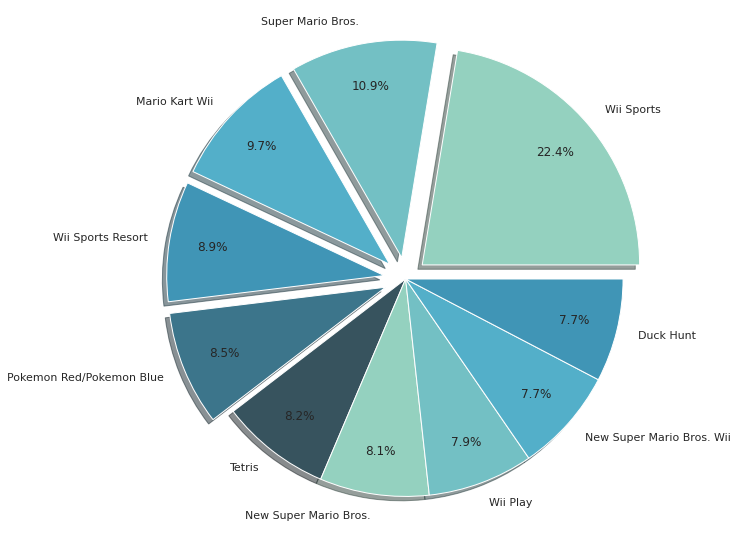

In [ ]:
#highest global sales 가장유명한 게임 
game = df.loc[:,['Name','Total_Sales']]
game = game.sort_values('Total_Sales',ascending=False)
game = game.head(10)
plt.figure(figsize=(10,10))
colors= sns.color_palette("GnBu_d")
explode = (0.1, 0.1, 0.1, 0.1, 0.1,0,0,0,0,0)
plt.pie(game['Total_Sales'], labels=game['Name'], autopct='%0.1f%%',shadow=True, colors=colors, explode=explode,pctdistance=0.8)

#plt.pie(game['Total_Sales'],labels=game['Name'],autopct='%1.1f%%', shadow=True))
plt.show()

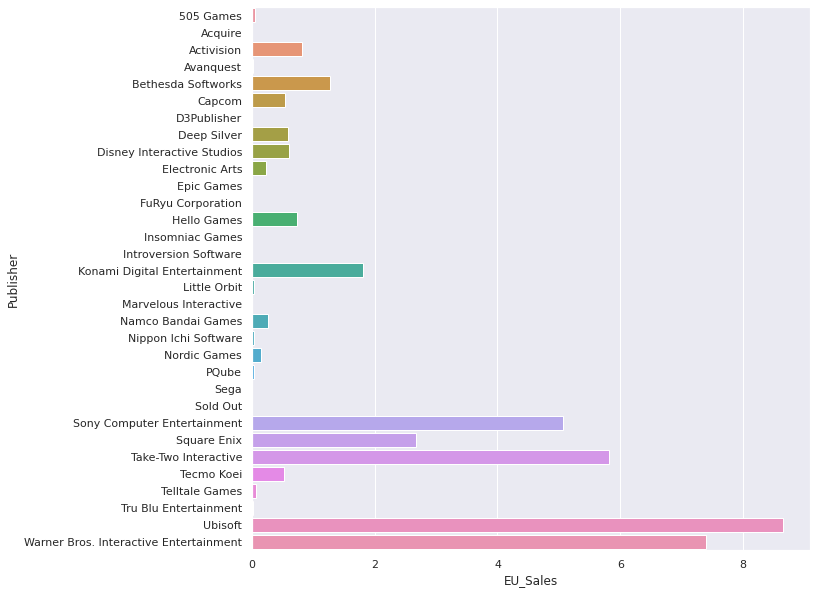

In [ ]:
#action 장르에서 ps4 도출하여 eu지역에서 가장 높은 출처
action = df.Genre =='Action'
df_action = df.loc[action]
ps4_filter = df_action.Platform =='PS4'
df_action_ps4 = df_action[ps4_filter].reset_index(drop=True)
df_action_ps4_final = df_action_ps4.groupby(['Publisher'])['EU_Sales'].sum().reset_index()
plt.figure(figsize=(10,10))
res_barplot =sns.barplot(x='EU_Sales', y='Publisher',data=df_action_ps4_final)
plt.show()